Using TensorFlow backend.


(50000, 28, 28) (50000,)


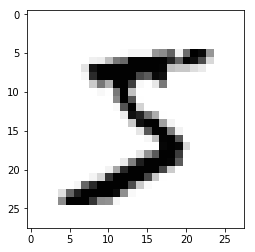

In [ ]:
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap="Greys");

In [2]:
import tensorflow as tf
import numpy as np
s = tf.InteractiveSession()

In [3]:
# Flattening training, validate and test sets
X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_val_flatten = X_val.reshape(X_val.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)
X_train_flatten.shape

(50000, 784)

In [4]:
#input placeholders for features and classes
x = tf.placeholder(tf.float32, shape=(None,784))
y = tf.placeholder(tf.float32,shape=(None, 10))

#Initialization of weights and bias
W1 = tf.get_variable("W1", [784,350], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
b1 = tf.get_variable("b1", [350], initializer = tf.zeros_initializer())
W2 = tf.get_variable("W2", [350, 10], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
b2 = tf.get_variable("b2", [10], initializer = tf.zeros_initializer())
#Activation layers
Z1 = tf.add(tf.matmul(x,W1), b1)                      
A1 = tf.nn.relu(Z1)                                    
Z2 = tf.add(tf.matmul(A1,W2), b2)
A2 = tf.nn.sigmoid(Z2)                                    

In [5]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=A2))

In [6]:
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

In [7]:
num_epochs = 200
batch_size = 100

In [ ]:
learning_rate = 0.001
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
init = tf.global_variables_initializer()

Cost after 10 epochs: 1.47591
Cost after 20 epochs: 1.46821
Cost after 60 epochs: 1.46521
Cost after 90 epochs: 1.46448
Cost after 100 epochs: 1.46413
Cost after 110 epochs: 1.4641
Cost after 120 epochs: 1.46471
Cost after 130 epochs: 1.46401
Cost after 140 epochs: 1.46466
Cost after 160 epochs: 1.46436
Cost after 170 epochs: 1.46395
Cost after 180 epochs: 1.46409
Cost after 190 epochs: 1.46452
Cost after 200 epochs: 1.46392


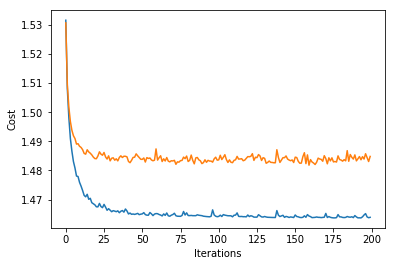

Train Accuracy: 0.9963
Test Accuracy: 0.9822


In [ ]:
with tf.Session() as sess:
    sess.run(init)
    
    train_costs = []
    test_costs = []
    
    for epoch in range(num_epochs):
        for i in range(0, 50000, batch_size):
            sess.run(optimizer, feed_dict={x:X_train_flatten[i:i+batch_size], y:y_train[i: i+batch_size]})
        train_costs.append(sess.run(cost, feed_dict={x:X_train_flatten, y:y_train}))
        test_costs.append(sess.run(cost, feed_dict={x:X_test_flatten, y:y_test}))
        if epoch%10 == 9:
            print("Cost after " + str(epoch+1)+ " epochs: "+ str(train_costs[-1]))
    
    iterations = list(range(num_epochs))
    plt.plot(iterations, train_costs, label='Train')
    plt.plot(iterations, test_costs, label='Test')
    plt.ylabel('Cost')
    plt.xlabel('Iterations')
    plt.show()
    
    # Predictions
    predict_op = tf.argmax(Z2, 1)
    correct_prediction = tf.equal(predict_op, tf.argmax(y, 1))

    # Accuracy calculation
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

    print ("Train Accuracy:", accuracy.eval({x: X_train_flatten, y: y_train}))
    print ("Test Accuracy:", accuracy.eval({x: X_test_flatten, y: y_test}))
